In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from plotting_functions import autocorrelation_plot
from plotting_functions import \
run_diagnostic_plots, plot_acf, plot_trace, plot_sensor_output, \
get_fname_list, plot_layer_posteriors, plot_fieldobs, plot_hist_diagnostic, make_chainstat_table, \
make_chains
import plotting_functions
import visvis as vv
import diagplots2
import pymc3
import matplotlib

import geovis_notebook_version

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## last stats table for temperature ladder
- note to generate the last_stats_table.csv I opened the obsidian.pbs.e* file on the HPC and copied a converged stats table out to a csv file

In [2]:
fpath_stats_table = '/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/last_stats_table.csv'
stacks = 4
chains = 12

In [3]:
df = pd.read_csv(fpath_stats_table,sep='\s+')
total = stacks * chains + 1
start_list = np.arange(0, total - chains, chains)
stop_list = np.arange(chains, total, chains)
print(start_list, stop_list)
df_stack_index_list = [
    range(start_i,stop_i) for start_i, stop_i in zip(start_list, stop_list)
]

FileNotFoundError: File b'/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/last_stats_table.csv' does not exist

In [ ]:
df_stack_list = [df.loc[l,:] for l in df_stack_index_list]
for df_stack in df_stack_list:
    assert(df_stack.shape[0] == chains)
    #assert(df.shape)

In [ ]:
data = np.abs(df_stack_list[1].diff(axis = 0))['Beta'].values

In [ ]:
data = [df_stack['Beta'].values for df_stack in df_stack_list]

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
x = list(range(1,13))
for y in data:
    plt.plot(x, np.log(y))
    ax.set_xticks(x)

In [ ]:
num = df_list[0].loc[1:11,'Beta'].values
denom = df_list[0].loc[0:10,'Beta'].values
data = denom/num
print(data)
plt.plot(data)

# Initialize plots

In [5]:
author = 'dk' # 'dk' or 'rs

rp_param_title_list = ['Rock density', 'Magnetic susceptibility']
#rp_layer_title_list = ['Layer 0', 'Layer 1']
rp_layer_title_list = ['Halfway Gneiss', 'Durlacher Supersuite']

if author == 'dk': # user input - for david's results
    dir_parent = '/Volumes/david_hd/obsidian/output/experiments/'
    dir_output_diagnostics = 'output/plots-diagnostic'
    dir_output_sensors = 'output/plots-sensors'
    fname_samples = 'output0.npz'
    #fname_samples = 'output.npz'
    
    # previous was 2018-11-15
    # new is 2018-12
    dir_year = '2018'
    dir_month = '11'
    dir_day = '15'
    exp_str = '{}_{}_{}'.format(dir_month, dir_day, dir_year)
    num_list = ['01']

    param_key_list = [
        'layer0rockProperties',
        'layer1rockProperties'
    ]
    param_idx_list = [0, 1]

    plot_function_list = [
        plot_acf,
        plot_trace,
        plot_hist_diagnostic,
        make_chainstat_table
    ]

    plot_function_names = [
        'acf',
        'trace',
        'hist',
        'chainstat-table',
    ]
    extension_list = [
        'eps',
        'eps',
        'eps',
        'csv',
    ]
    # for sensor plot output
    sensor_name_list = ['grav', 'mag'] #'grav' or 'mag'

    data_names_list = [
        'magSensors','magReadings','gravSensors','gravReadings'
    ]
    xp = lambda exp_str, num: os.path.join(exp_str, num)

elif author == 'rs': # user input - for richard's results
    dir_parent = '/Volumes/david_hd/obsidian/output/experiments/'
    dir_output_diagnostics = 'output/plots-diagnostic'
    dir_output_sensors = 'output/plots-sensors'
    #fname_samples = 'gascoyne_v4.npz'

    exp_str = 'gascoyne_v5_run'
    fname_samples = 'gascoyne_v5-rs-run03-thin1000.npz'
    #fname_samples = 'output.npz'
    #num_list = ['01', '02', '03', '04', '05', '06']
    num_list = ['03']

    param_key_list = [
        'layer0rockProperties',
        'layer1rockProperties'
    ]
    param_idx_list = [0, 1]

    plot_function_list = [
        plot_acf,
        plot_trace,
        plot_hist_diagnostic,
        make_chainstat_table
    ]

    plot_function_names = [
        'acf',
        'trace',
        'hist',
        'chainstat-table'
    ]
    extension_list = [
        'eps',
        'eps',
        'eps',
        'csv',
    ]
    # for sensor plot output
    sensor_name_list = ['grav', 'mag'] #'grav' or 'mag'

    data_names_list = [
        'magSensors','magReadings','gravSensors','gravReadings'
    ]
    xp = lambda exp_str, num: exp_str + num

# Diagnostic plots

In [6]:
# put together file paths
if author == 'dk':
    fpath_in_list = [
        os.path.join(dir_parent, exp_str, num, fname_samples)
        for num in num_list
    ]
    dir_out_list = [
        os.path.join(dir_parent, exp_str, num, dir_output_diagnostics)
        for num in num_list
    ]
elif author == 'rs':
    fpath_in_list = [
        os.path.join(dir_parent, exp_str + num, fname_samples)
        for num in num_list
    ]
    dir_out_list = [
        os.path.join(dir_parent, exp_str + num, dir_output_diagnostics)
        for num in num_list
    ]
print(fpath_in_list)
print(dir_out_list)

['/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/output0.npz']
['/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/output/plots-diagnostic']


In [60]:
#layer_title_list = ['Layer 0', 'Layer 1']
layer_title_list = ['Halfway Gneiss', 'Durlacher Supersuite']
param_title_list = ['Rock density', 'Magnetic susceptibility']
#stack_length_list = [1160161, 1154009, 1129264, 1111255]
stack_length_list = [1592406, 1551447, 1567431, 1555443, 1566432, 1593405] # for 2018-11-15
n_burn = 0
n_thin = 1000

 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future


rock density
test


IndexError: list index out of range

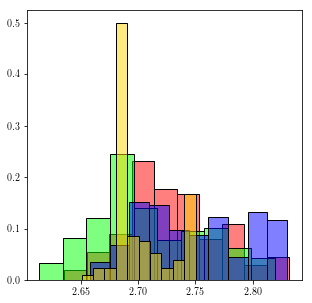

In [9]:
# make plots
run_diagnostic_plots(
    fpath_in_list,
    dir_out_list,
    param_key_list,
    param_idx_list,
    plot_function_list,
    extension_list,
    plot_function_names,
    layer_title_list,
    param_title_list,
    n_burn = n_burn,
    n_thin = n_thin,
    stack_length_list = stack_length_list
)

# Diagnostic hist testing

In [54]:
layer_params[:,0].shape

(9412,)

In [61]:
for experiment_idx, (fpath_in, dir_out) in enumerate(zip(fpath_in_list, dir_out_list)):
    if not os.path.isdir(dir_out):
        os.makedirs(dir_out)
    if os.path.exists(fpath_in):
        samples_i = np.load(fpath_in)
        for layer_idx, layer in enumerate(param_key_list):
            layer_params = samples_i[layer]
            layer_title = layer
            if layer_title_list:
                layer_title = layer_title_list[layer_idx]
            for param_idx in param_idx_list:
                param = layer_params[:, param_idx]
                if np.any(stack_length_list):
                    param = make_chains(param, stack_length_list, n_burn, n_thin, make_uniform_length = False)
                param_title = 'param {}'.format(param_title_list[param_idx])
                if param_title_list:
                    param_title = param_title_list[param_idx].lower()
                fname_fig_param = '{}-param{}'.format(layer,param_idx)
                plot_func = test_hist
                plot_func_name = 'hist'
                extension = 'eps'
                fname_fig = '{}-{}.{}'.format(plot_func_name, fname_fig_param, extension)
                dir_out = '/Users/davidkohn/Desktop'
                fpath_out = os.path.join(dir_out, fname_fig)
                plot_title = '{} {}'.format(layer_title, param_title)
                #print('param.shape: {}'.format(param.shape))
                data = param[n_burn:]
                #print('data.shape: {}'.format(data.shape))
                plot_func(
                    param[n_burn:], 
                    fpath_out = fpath_out, 
                    plot_title = plot_title
                )


 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_function

In [ ]:
samples_i['layer1rockProperties'][:,1].mean()

In [ ]:
samples_i['layer1rockProperties'][:,1].std()

In [ ]:
plt.hist(samples_i['layer1rockProperties'][:,1])

In [18]:
means = [
    2.7022, -3.6325, 2.6972, -3.5178
]
variances = [
    0.0260, 0.1297, 0.006, 0.6044
]
x_labels1 = [
    2.55 , -4.30, 2.50, -2.75
]
# layer 0 density
"""for layer_mean, layer_var in zip(means, variances):
    for param_mean, param_var, in zip(layer_mean, layer_var):
        print(param_mean - np.sqrt(param_var), param_mean + np.sqrt(param_var))"""

'for layer_mean, layer_var in zip(means, variances):\n    for param_mean, param_var, in zip(layer_mean, layer_var):\n        print(param_mean - np.sqrt(param_var), param_mean + np.sqrt(param_var))'

In [19]:
try:
    plt.rc('text', usetex = True)
    plt.rc('font', family = 'serif')
except:
    pass

In [39]:
layer_params.shape[0]/6

1568.6666666666667

 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_functions.py:78: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future
 /Users/davidkohn/dev/obsidian/src/python-utils/plotting_function

test
2.55
[2.7262724931522633] ['2.73']


 /Users/davidkohn/anaconda2/envs/ipy361/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning:Mean of empty slice.
 /Users/davidkohn/anaconda2/envs/ipy361/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning:Degrees of freedom <= 0 for slice
 /Users/davidkohn/anaconda2/envs/ipy361/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning:Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'


ZeroDivisionError: 0.0 cannot be raised to a negative power

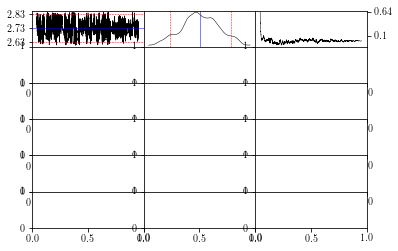

In [43]:
for experiment_idx, (fpath_in, dir_out) in enumerate(zip(fpath_in_list, dir_out_list)):
    if not os.path.isdir(dir_out):
        os.makedirs(dir_out)
    if os.path.exists(fpath_in):
        samples_i = np.load(fpath_in)
        idx = 0
        for layer_idx, layer in enumerate(param_key_list):
            layer_params = samples_i[layer]
            layer_title = layer
            if layer_title_list:
                layer_title = layer_title_list[layer_idx]
            for param_idx in param_idx_list:
                param = layer_params[:, param_idx]
                if np.any(stack_length_list):
                    param = make_chains(param, stack_length_list, n_burn, n_thin, make_uniform_length = False)
                param_title = 'param {}'.format(param_title_list[param_idx])
                if param_title_list:
                    param_title = param_title_list[param_idx].lower()
                fname_fig_param = '{}-param{}'.format(layer,param_idx)
                plot_func = test_trace
                plot_func_name = 'trace'
                extension = 'eps'
                fname_fig = '{}-{}.{}'.format(plot_func_name, fname_fig_param, extension)
                if param_title == 'rock density':
                    print('test')
                    ylabel = 'Density ($g$ cm$^{-3}$)'
                elif param_title == 'magnetic susceptibility':
                    ylabel = 'Log susceptibility ($T$ cm$^{-9}$)'

                dir_out = '/Users/davidkohn/Desktop'
                fpath_out = os.path.join(dir_out, fname_fig)
                plot_title = '{} {}'.format(layer_title, param_title)
                #print('param.shape: {}'.format(param.shape))
                data = param[n_burn:]
                #print('data.shape: {}'.format(data.shape))
                print( x_labels1[idx])
                plot_func(
                    param[n_burn:], 
                    fpath_out = fpath_out, 
                    plot_title = plot_title,
                    y_label = ylabel,
                    mean_i = means[idx],
                    var_i = variances[idx],
                    x_label_ax1_loc = x_labels1[idx]
                )
                idx += 1
                #break
            #break


In [15]:
# test_trace makes a combined trace-histogram plot
def test_trace(
    data,
    img_format = 'png',
    fpath_out = None,
    plot_title = None,
    thin_amount = None,
    lw = 0.5,
    y_label = 'Parameter Value',
    fontsize=20,
    mean_i = 0,
    var_i = 0,
    x_label_ax1_loc = None
):
    try:
        plt.rc('text', usetex = True)
        plt.rc('font', family = 'serif')
    except:
        pass
    x_label = 'Sample Number (thinned $\\times 1000$)'
    if thin_amount:
        x_label = 'MCMC iteration (thinned $\\times {}$)'.format(thin_amount)
    #f = plt.figure(figsize = (fig_width, fig_height))
    #f, axes = plt.subplots(4, 2, figsize=(5,5))
    f, axes = plt.subplots(len(data), 3)
    plt.subplots_adjust(wspace=0, hspace=0)
    #print(axes)
    data = [plotting_functions.reject_outliers(data_i) for data_i in data]
    data_max = np.max(np.concatenate(data))
    data_min = np.min(np.concatenate(data))
    #print(data_min)
    prior_lower = mean_i - np.sqrt(var_i)
    #print(prior_lower)
    prior_upper = mean_i + np.sqrt(var_i)
    if prior_lower < data_min: 
        #print('setting data_min')
        data_min = prior_lower + prior_lower * 0.01
        #print(data_min)
    for idx, (data_i, ax) in enumerate(zip(data, axes)):
        ax1, ax2, ax3 = ax
        # axis2 is histogram/density plot
        _ = sns.kdeplot(data_i, ax = ax2, color='black', lw=0.5)
        _ = ax2.axvline(np.mean(data_i), color='blue', lw=0.5)
        _ = ax2.axvline(np.percentile(data_i, 95), color='red', ls='dashed', lw=0.5)
        _ = ax2.axvline(np.percentile(data_i, 5), color='red', ls='dashed', lw=0.5)
        #print(mean_i, var_i)
        #_ = ax2.axvline(mean_i - 2 * np.sqrt(var_i), color='green', ls='dashed', lw=0.5)
        #_ = ax2.axvline(mean_i + 2 * np.sqrt(var_i), color='green', ls='dashed', lw=0.5)
        #_ = ax2.set_xlim([data_min, data_max])
        
        # axis1 is trace plot
        _ = ax1.plot(data_i, linewidth = lw, color='black', lw=0.5)
        _ = ax1.axhline(np.mean(data_i), color='blue', lw=0.5)
        _ = ax1.axhline(np.percentile(data_i, 97.5), color='red', ls='dashed', lw=0.5)
        _ = ax1.axhline(np.percentile(data_i, 2.5), color='red', ls='dashed', lw=0.5)
        
        # axis3 is acf plot
        _ = autocorrelation_plot(data_i, ax = ax3)
        plt.setp(ax3.lines, linewidth = 0.5)

        # x axis
        """
        start = 0
        end = np.max(data_i)
        middle = (end - start) / 2
        new_xt = [start, middle, end]
        ax3.set_xticks(new_xt)
        ax3.set_xticklabels([int(num) for num in new_xt])
        ax3.set_xlim([start, end])
        _ = plt.xticks(fontsize = fontsize)
        _ = plt.xlabel(x_label, fontsize = fontsize)
        """

        # y axis
        #start = np.min([np.min(line.get_ydata()) for line in ax3.lines])
        end = np.around(np.max([np.max(line.get_ydata()) for line in ax3.lines]), decimals = 2)
        #middle = (end + start) / 2
        #new_yt = [start, middle, end]
        #new_yt = np.around(new_yt, decimals = 2)
        #new_yt = np.append(new_yt,0)
        #new_yt = np.sort(new_yt)
        new_yt = [0.1, end]
        ax3.set_yticks(new_yt)
        ax3.set_yticklabels(new_yt)
        ax3.yaxis.tick_right()
        #_ = plt.ax3(fontsize = fontsize)
        #_ = plt.ylabel(y_label, fontsize = fontsize)
        
        
        yticks = [np.percentile(data_i, 2.5), np.mean(data_i), np.percentile(data_i, 97.5)]
        yticklabels = ['{:.2f}'.format(yt_i) for yt_i in yticks]
        _ = ax1.set_yticks(yticks)
        _ = ax1.set_yticklabels(yticklabels)
        yt = [np.mean(data_i)]
        ytl = ['{:.2f}'.format(yt_i) for yt_i in yt]
        print(yt, ytl)
        _ = ax2.set_yticks([])
        _ = ax2.set_yticklabels([])
        if idx != len(data) - 1:
            _ = ax1.set_xticks([])
            _ = ax1.set_xticklabels([])
            _ = ax2.set_xticks([])
            _ = ax2.set_xticklabels([])
            _ = ax3.set_xticks([])
            _ = ax3.set_xticklabels([])
        else:
            #ax1.text(500,x_label_ax1_loc,'MCMC Sample', fontsize=15)
            label_fontsize = 10
            ax1.set_xlabel('MCMC Sample', fontsize=label_fontsize)
            ax2.set_xlabel(y_label, fontsize=label_fontsize)
            ax3.set_xlabel('MCMC Sample', fontsize=label_fontsize)
            
            ax1.set_xticks([1, len(data_i)])
            ax2_xticks = [np.percentile(data_i, 5), np.mean(data_i), np.percentile(data_i, 95)]
            ax2_xtick_labels = [np.around(xti, decimals=2) for xti in ax2_xticks]
            ax2.set_xticks(ax2_xticks)
            ax2.set_xticklabels(ax2_xtick_labels)
            ax3.set_xticks([1, len(data_i)])

    #f.text(0.04, 0.5, y_label, va='center', rotation='vertical')
    f.text(0.05, 0.9020, y_label, va='center', fontsize = label_fontsize)
    f.text(0.35, 0.9020, 'Density', va='center', fontsize = label_fontsize)
    f.text(0.625, 0.9020, 'Autocorrelation', va='center', fontsize = label_fontsize)

    if plot_title: f.suptitle(plot_title.title(), fontsize = fontsize)
    #plt.tight_layout()
    plt.savefig(fpath_out)
    plt.clf()


In [16]:
import seaborn as sns
sns.reset_orig()
def test_hist(
    data,
    fpath_out,
    plot_title = None,
    fig_width = 5,
    fig_height = 5,
    bins = 10,
    width = 0.1,
    tick_fontsize = 20,
    xlab = 'Parameter bin value',
    mean_labels = True,
    mean_line = True,
    xlabels = [],
    fontsize = 20,

):
    data_list = [plotting_functions.reject_outliers(data_i) for data_i in data]
    colors = ['red', 'green', 'blue', 'orange']
    colors = [matplotlib.colors.to_rgba(color, alpha=0.5) for color in colors]
    #colors = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (1,215/255,0,0.5)]
    idx = 0
    fig = plt.figure(figsize=(fig_width, fig_height))
    ax = plt.gca()
    yd_list = []
    for data_i in data_list:
        weights = np.ones_like(data_i)/float(len(data_i))
        """h = plt.hist(
            data_i, 
            bins = bins, 
            weights = weights,
            fc = colors[idx],
            ec='black',
        )"""
        _ = sns.kdeplot(data_i)
        idx += 1
    yd = [line.get_ydata() for line in ax.get_lines()]
    yd_list.append(yd)
    yd = np.array(yd_list)
    mini = np.min([np.min(data_i) for data_i in data_list])
    maxi = np.max([np.max(data_i) for data_i in data_list])
    mean = np.mean([np.mean(data_i) for data_i in data_list])
    xt = [mini, mean, maxi]
    xtl = ['{:.2f}'.format(xt_i) for xt_i in xt]
    _ = plt.xlabel(xlab, fontsize = fontsize)
    _ = plt.ylabel('Density', fontsize = fontsize)
    _ = plt.xticks(xt, fontsize = tick_fontsize)
    _ = ax.set_xticklabels(xtl)
    #yt = ax.get_yticks()[1:]
    yt = [0, (np.max(yd))/2, np.max(yd)]
    ytl = ['{:.2f}'.format(yt_i) for yt_i in yt]
    _ = plt.yticks(yt, fontsize = tick_fontsize)
    _ = ax.set_yticklabels(ytl)
    if plot_title:
        _ = plt.title(plot_title, fontsize = fontsize)
    plt.tight_layout()
    #plt.show()
    plt.savefig(fpath_out)
    plt.clf()

# Sensor plots

In [ ]:
# put together file paths
#subsample_csv = False
#fname_samples = 'output.npz'
#fname_samples = 'gascoyne_v5-rs-run02-thin1000.npz'

data_names_list_sensorplots = data_names_list
#data_names_list_sensorplots = ['magSensors_subsamp', 'magReadings_subsamp', 'gravSensors', 'gravReadings']
#data_names_list_sensorplots = ['magSensors_rndsub', 'magReadings_rndsub', 'gravSensors_rndsub', 'gravReadings_rndsub']

fpath_samples_list = [
    os.path.join(dir_parent, xp(exp_str, num), fname_samples)
    for num in num_list
]

fpath_csv_list = [
    [
        os.path.join(dir_parent, xp(exp_str, num), "{}".format(data_name) + ".csv")
        for data_name in data_names_list_sensorplots
    ]
    for num in num_list
]

fieldobs_names_list = ['fieldobsSensors', 'fieldobsReadings']
fpath_fieldobs_csv_list = [
    [
        os.path.join(dir_parent, xp(exp_str, num), "{}".format(data_name) + ".csv")
        for data_name in fieldobs_names_list
    ]
    for num in num_list
]

dir_out_list = [
    os.path.join(dir_parent, xp(exp_str, num), dir_output_sensors)
    for num in num_list
]
print(dir_out_list)

In [ ]:
_ = plot_sensor_output(fpath_samples_list, dir_out_list, fpath_csv_list, data_names_list)

In [ ]:
sensors, readings = plot_fieldobs(
    fpath_samples_list, dir_out_list, fpath_fieldobs_csv_list, fieldobs_names_list
)

# Testing histograms of data

In [ ]:
try:
    plt.rc('text', usetex = True)
    plt.rc('font', family = 'serif')
except:
    pass

In [ ]:
#mag_sensors = pd.read_csv('/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/magSensors.csv', names=['x', 'y'], comment='#')
mag_actual = pd.read_csv('/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/magReadings.csv', comment='#', header=None)
grav_actual = pd.read_csv('/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/gravReadings.csv', comment='#', header=None)

In [ ]:
print(weights.shape)
print(data.shape)

In [ ]:
data = mag_actual.values
data = grav_actual.values
n = data.shape[0]
f = plt.figure(figsize=(5,5))
ax = plt.gca()
weights = np.ones((n,1))/n
plt.hist(
    data, bins = 20, weights = weights, fill=None
)

mean = np.mean(data)
plt.axvline(mean,c='red')

"""yt = ax.get_yticks()[1:-1]
ytl = ['{:.0f}\%'.format(yt_i * 100) for yt_i in yt]
_ = ax.set_yticks(yt)
_ = ax.set_yticklabels(ytl)

xt = ax.get_xticks()[1:-1]
xtl = ['{:.0f}\%'.format(xt_i * 100) for xt_i in xt]
_ = ax.set_xticks(xt)
_ = ax.set_xticklabels(xtl)"""

_ = plt.xlabel('Mag')
_ = plt.ylabel('Probability')
#plt.savefig('/Users/davidkohn/Desktop/fieldobs-p.eps')""

## fieldobs confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.DataFrame([actual, predicted], index=['actual', 'predicted']).T
not_missing_idx = df['actual'] != -1
df = df.loc[not_missing_idx, :].reset_index(drop = True)

In [ ]:
labels = [0, 1]
cnf = confusion_matrix(df['actual'], df['predicted'])
df_cnf = pd.DataFrame(cnf, columns=labels, index=labels)
df_cnf.index.name = 'True label'
df_cnf.columns.name = 'Predicted label'
df_cnf

In [ ]:
tp = df_cnf.loc[1,1]
tn = df_cnf.loc[0,0]
fn = df_cnf.loc[0,1]
fp = df_cnf.loc[1,0]
sensitivity = tn/(tn + fp)
specificity = tp/(tp + fn)
precision = tp/(tp + fp)
print(sensitivity, specificity, precision)


In [ ]:
import sklearn.metrics
# true positive / total positives
print(sklearn.metrics.precision_score(df['actual'], df['predicted']))
# true positive / (true pos + false neg)
print(sklearn.metrics.recall_score(df['actual'], df['predicted']))

In [ ]:
df_cnf.to_csv('/Users/davidkohn/Desktop/confusion_matrix.csv')

In [ ]:
df_cnf

# Additional fieldobs plots

In [ ]:
fpath = fpath_samples_list[0]
fpath = '/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/output0.npz'
print(fpath)
samples = np.load(fpath)
sensors = pd.read_csv('/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/fieldobsSensors.csv', names=['x', 'y'], comment='#')
actual = pd.read_csv('/Volumes/david_hd/obsidian/output/experiments/11_15_2018/01/fieldobsReadings.csv', comment='#', header=None)
fr = samples['fieldReadings']
valid_bool = (actual.values != -1).flatten()
actual = actual[valid_bool].values
sensors = sensors.loc[valid_bool, :].reset_index(drop=True)
fr = fr[:,valid_bool]

In [ ]:
print(fr.shape)
print(sensors.shape)
print(actual.shape)

In [ ]:
n = fr.shape[0]
fr_uncertainty = fr.sum(axis = 0)/n
#fr_uncertainty = (fr.T - actual).T.sum(axis=0)/n

In [ ]:
print(fr.shape)
print(actual.shape)

In [ ]:
layers = ['Halfway Gneiss', 'Durlacher Supersuite']
layer_dict = {
    0: 'Halfway Gneiss',
    1: 'Durlacher Supersuite'
}

## fieldobs uncertainty

In [ ]:
fontsize = 20
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
color_data = fr_uncertainty * 100
color_data = np.round(fr_uncertainty,2) * 100
markers = ['o', '*']
marker_idx = 0
for unq in np.unique(actual):
    unq_bool = (actual == unq).flatten()
    plt.scatter(
        sensors.loc[unq_bool, 'x'].values, sensors.loc[unq_bool,'y'].values,
        c = color_data[unq_bool],
        marker=markers[marker_idx],
        vmin=0,vmax=100,label=layer_dict[unq],edgecolor='black',linewidth=0.1,
    )
    marker_idx+=1

ax.set_xlabel('Eastings (km)',fontsize=fontsize)
ax.set_ylabel('Northings (km)',fontsize=fontsize)

leg = ax.legend()
leg.legendHandles[0].set_color('white')
leg.legendHandles[0].set_edgecolor('black')
leg.legendHandles[0].set_linewidth(0.5)
leg.legendHandles[1].set_color('white')
leg.legendHandles[1].set_edgecolor('black')
leg.legendHandles[1].set_linewidth(0.5)

cbt = [0, 50, 100]
cbtl = ['{}\%'.format(cbt_i) for cbt_i in cbt]
cb = plt.colorbar(ticks = cbt)
cb.set_ticklabels(cbtl)
cb.ax.tick_params(labelsize=fontsize)
cb.set_label('Durlacher Supersuite \% Certainty',fontsize=fontsize)


ticks = [0, 7500, 15000]
tick_labels = [
    '{:.0f}'.format(tick/1000) if float(tick/1000).is_integer()
    else '{:.1f}'.format(tick/1000)
    for tick in ticks
]
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels,fontsize=fontsize)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=fontsize)

ax.set_xlim(0, 15000)
ax.set_ylim(0, 15000)

ax.set_aspect('equal')
plt.tight_layout()

plt.savefig('/Users/davidkohn/Desktop/fieldobs-uncertainty.eps')

In [ ]:
ylim

In [ ]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

## fieldobs uncertainty exlcuding <10% and >90% uncertainties

In [ ]:
cc_og = pd.Series(color_data)
other_bool = ~cc_og.isin([0,1,100])
cc = cc_og[other_bool]
cc_vc = cc.value_counts(ascending = False)
gt10_bool = (cc_vc.index > 10) & (cc_vc.index < 90)
cc_vc[gt10_bool].shape
#cc.value_counts()

In [ ]:
sensors_cc

In [ ]:
print(actual_cc.shape)
print(cc_bool.shape)
print(sensors_cc.shape)
print(cc_new.shape)

In [ ]:
#color_data = fr_uncertainty * 100
color_data = np.round(fr_uncertainty,2) * 100
cc_og = pd.Series(color_data)
cc_bool = (cc_og < 97.5) & (cc_og > 2.5)
cc_new = cc_og[cc_bool]
sensors_cc = sensors.loc[cc_bool, :]
actual_cc = actual[np.where(cc_bool)]

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

formatted_text = ['{:.0f}\%'.format(t) for t in cc_new]
markers = ['o', '*']
marker_idx = 0
for unq in np.unique(actual_cc):
    print(unq)
    unq_bool = (actual_cc == unq).flatten()
    plt.scatter(
        sensors_cc.loc[unq_bool, 'x'].values, sensors_cc.loc[unq_bool,'y'].values,
        c = cc_new[unq_bool],
        marker=markers[marker_idx],
        vmin=0,vmax=100,label=layer_dict[unq],edgecolor='black',linewidth=0.1,
    )
    marker_idx+=1

leg = ax.legend()
leg.legendHandles[0].set_color('white')
leg.legendHandles[0].set_edgecolor('black')
leg.legendHandles[0].set_linewidth(0.5)
leg.legendHandles[1].set_color('white')
leg.legendHandles[1].set_edgecolor('black')
leg.legendHandles[1].set_linewidth(0.5)

# add annotations with the following
#for x, y, txt in zip(sensors_cc['x'], sensors_cc['y'], formatted_text):ax.annotate(txt, (x+np.random.choice([200,-200,400,-400]), y+np.random.choice([200,-200, 400,-400])),verticalalignment='bottom')

_ = plt.xlabel('Eastings (km)',fontsize=fontsize)
_ = plt.ylabel('Northings (km)',fontsize=fontsize)

cbt = [0, 50, 100]
cbtl = ['{:.0f}\%'.format(cbt_i) for cbt_i in cbt]
cb = plt.colorbar(ticks = cbt)
cb.set_ticklabels(cbtl)
cb.ax.tick_params(labelsize=fontsize)
cb.set_label('Durlacher Supersuite \% Certainty',fontsize=fontsize)

ticks = [0, 7500, 15000]
tick_labels = [
    '{:.0f}'.format(tick/1000) if float(tick/1000).is_integer()
    else '{:.1f}'.format(tick/1000)
    for tick in ticks
]

ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels,fontsize=fontsize)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=fontsize)

ax.set_xlim(0, 15000)
ax.set_ylim(0, 15000)

ax.set_aspect('equal')
plt.tight_layout()

plt.savefig('/Users/davidkohn/Desktop/fieldobs-uncertainty-subsection.eps')

In [ ]:
difference_from_actual = (actual.flatten() - np.round(fr_uncertainty,2)) * 100
#nonzero_diff_bool = (difference_from_actual != 0).flatten()
nonzero_diff_bool = (np.abs(difference_from_actual) > 10).flatten()
nonzero_diff_idx = np.where(nonzero_diff_bool)
sensors_nz = sensors.loc[nonzero_diff_bool, :]
difference_from_actual_nz = np.abs(difference_from_actual[nonzero_diff_idx])
fr_uncertainty_nz = np.round(fr_uncertainty[nonzero_diff_bool],2)*100
actual_nz = actual[nonzero_diff_idx]

marker_idx = 0
f = plt.figure(figsize=(5,5))
ax = plt.gca()
for unq in np.unique(actual_nz):
    print(unq)
    unq_bool = (actual_nz == unq).flatten()
    plt.scatter(
        sensors_nz.loc[unq_bool, 'x'].values, sensors_nz.loc[unq_bool,'y'].values,
        c = fr_uncertainty_nz[unq_bool],
        #c = difference_from_actual_nz[unq_bool],
        marker=markers[marker_idx],
        vmin=0,vmax=100,label=layer_dict[unq],edgecolor='black',linewidth=0.1,
    )
    marker_idx+=1

_ = plt.xlabel('Eastings (km)',fontsize=fontsize)
_ = plt.ylabel('Northings (km)',fontsize=fontsize)

cbt = [0, 50, 100]
cbtl = ['{:.0f}\%'.format(cbt_i) for cbt_i in cbt]
cb = plt.colorbar(ticks = cbt)
cb.set_ticklabels(cbtl)
cb.ax.tick_params(labelsize=fontsize)
#cb.set_label('\% Difference From Actual',fontsize=fontsize)
cb.set_label('Durlacher Supersuite \% Certainty',fontsize=fontsize)

ticks = [0, 7500, 15000]
tick_labels = [
    '{:.0f}'.format(tick/1000) if float(tick/1000).is_integer()
    else '{:.1f}'.format(tick/1000)
    for tick in ticks
]

ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels,fontsize=fontsize)
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize=fontsize)

ax.set_xlim(0, 15000)
ax.set_ylim(0, 15000)

ax.set_aspect('equal')
plt.tight_layout()

plt.savefig('/Users/davidkohn/Desktop/fieldobs-test.eps')

## p-hat posterior

In [ ]:
f = plt.figure(figsize=(5,5))
ax = plt.gca()
n_samples = fr.shape[0]
n_points = fr.shape[1]
fr_sum = fr.sum(axis = 1)
fracs = fr_sum / n_points
weights = np.ones((n_samples,1))/n_samples
plt.hist(
    fracs, bins = 20, weights = weights, fill=None
)

mean = np.mean(fracs)
plt.axvline(mean,c='red')

yt = ax.get_yticks()[1:-1]
ytl = ['{:.0f}\%'.format(yt_i * 100) for yt_i in yt]
_ = ax.set_yticks(yt)
_ = ax.set_yticklabels(ytl)

xt = ax.get_xticks()[1:-1]
xtl = ['{:.0f}\%'.format(xt_i * 100) for xt_i in xt]
_ = ax.set_xticks(xt)
_ = ax.set_xticklabels(xtl)

_ = plt.xlabel('$\hat{p}$')
_ = plt.ylabel('Posterior probability')
plt.savefig('/Users/davidkohn/Desktop/fieldobs-p.eps')

## Parameter mean table

In [ ]:
layer_title_list = ['Layer 0', 'Layer 1']
p_list = [p.capitalize() for p in param_title_list]

table = pd.DataFrame(0, index = layer_title_list, columns = p_list)
print(table)

In [ ]:
for samples_key, layer_title in zip(param_key_list, layer_title_list):
    for param_idx, param_title in zip(param_idx_list, p_list):
        param = samples[samples_key][:, param_idx]
        stat = param.mean()
        #print('{} {} {}'.format(samples_key, param_title, param.mean()))
        table.loc[layer_title, param_title] = stat

In [ ]:
table.to_csv('/Users/davidkohn/Desktop/mean.csv')

# Testing

# Voxel plots

In [ ]:
# put together file paths
dir_output_voxels = 'output/plots-voxels'
search_str = 'voxel'
dir_voxels = 'voxels'
#dir_voxels = ''
if author == 'dk':
    fpath_in_list = [
        get_fname_list(os.path.join(dir_parent, exp_str, num, dir_voxels), search_str)
        for num in num_list
    ]
    dir_out_list = [
        os.path.join(dir_parent, exp_str, num, dir_output_voxels)
        for num in num_list
    ]
elif author == 'rs':
    fpath_in_list = [
        get_fname_list(os.path.join(dir_parent, exp_str + num), search_str)
        for num in num_list
    ]
    dir_out_list = [
        os.path.join(dir_parent, exp_str + num, dir_output_voxels)
        for num in num_list
    ]
print(fpath_in_list)
print(dir_out_list)

In [ ]:
fname_save_template_str = 'posterior-layer-{:02}.{}'
view_list = []
for voxel_path_list, dir_out in zip(fpath_in_list, dir_out_list):
    if voxel_path_list:
        view = plot_layer_posteriors(voxel_path_list, dir_out)
        view_list.append(view)

In [ ]:
f = fpath_in_list[0][0]
v = np.load(f)

In [ ]:
v.keys()

In [ ]:
v['boundary0'].shape

In [ ]:
fb_layer0 = view.fbounds[0]
fb_layer1 = view.fbounds[1]
#fb = fb.mean(axis = 0)
#cond = fb == 0
#print(cond.sum())
#print(71 * 36 * 36)

In [ ]:
sample_idx = -1
fb_layer0_sample = fb_layer0[sample_idx,:,:]
fb_layer1_sample = fb_layer1[sample_idx,:,:]

In [ ]:
fb_layer0_sample.size

In [ ]:
zero_cond = fb_layer0_sample == 0 
zero_cond.sum()

In [ ]:
zero_cond = fb_layer1_sample == 0 
zero_cond.sum()

In [ ]:
x, y = np.where(cond)

In [ ]:
x[0], y[0]

In [ ]:
fb[x[0], y[0]]

In [ ]:
view_idx = 0
layer_idx = 1
sample_idx = -1

view = view_list[view_idx]
layer_voxels = view.layers[layer_idx][0,:,:,:]

In [ ]:
view.layers[0].shape

In [ ]:
print(view.layers[0][-1, :, 0, 0].reshape(-1, 1))

In [ ]:
print(view.layers[1][-1, :, 0, 0].reshape(-1, 1))

In [ ]:
print(view.fbounds[0][-1,0,0])
print(view.fbounds[1][-1,0,0])

In [ ]:
layer_voxels[x[0], y[0], 0]

In [ ]:
view.rockprops['Density'].shape

In [ ]:
view.layers[0].shape

In [ ]:
layer_voxels[0,0,:]

In [ ]:
view_idx = 0
layer_idx = 0
sample_idx = -1

view = view_list[view_idx]
layer_voxels = view.layers[layer_idx]
sample_voxels = layer_voxels[sample_idx,:,:,:]

fb = view.fbounds[layer_idx]

In [ ]:
mean_layer_bounds = fb.mean(axis = 0)

In [ ]:
mean_layer_bounds.sum()

In [ ]:
(view.layers[0][-1,:,:,:] + view.layers[1][-1,:,:,:]).sum()

In [ ]:
(view.layers[0][-1,:,:,0] != 0).sum()

In [ ]:
344/(36*82)

In [ ]:
l.shape

In [ ]:
l = view.layers[0][-1,:,:,:]
l[0, :, :]

In [ ]:
l = view.layers[1][-1,:,:,:]
l[0, :, :]

In [ ]:
view.fbounds[0][-1]

In [ ]:
voxel_size = view.zbounds[1]/12

In [ ]:
view.fbounds[1][-1].flatten().shape

In [ ]:
(view.fbounds[0][-1, :, :] == 0).sum()

In [ ]:
(view.fbounds[1][-1, :, :] == 0).sum()

In [ ]:
(view.fbounds[0][-1].flatten() == 0).sum()

In [ ]:
(view.fbounds[1][-1].flatten() == 0).sum()

In [ ]:
view.fbounds[1][-1].flatten().shape

In [ ]:
(view.fbounds[1][-1].flatten() < voxel_size).sum()

In [ ]:
# view = a specific experiment in the list
view_idx = 0
layer_idx = 1

view = view_list[view_idx]
layer_voxels = view.meanlayer(layer_idx)
#view_idx = 0
#layer_idx = 1
#sample_idx = -1

#view = view_list[view_idx]
#layer_voxels = view.layers[layer_idx][sample_idx,:,:,:]
#l = view.layers[0][-1,:,:,:]

app = vv.use()
vv.figure(1)
vv.settings.figureSize = (100, 100)
vv.xlabel('East (voxels)')
vv.ylabel('North (voxels)')
vv.zlabel('Depth (voxels)')
a = vv.gca()
print(a.GetView())
#a.loc = (0, 0, 100)
#a.azimuth = 100
#a.camera.fov = 10
a.daspect = 1, 1, -1
a.camera.elevation = -90
#a.camera.azimuth = 30
a.camera.roll = 10
print(a.GetView())
print(a.camera)
#a.camera.
a.SetView()
#t = vv.volshow(l, cm=vv.CM_JET)
#t = vv.volshow(layer_voxels, cm=vv.CM_JET, renderStyle='ray')
t = vv.volshow(layer_voxels, cm=vv.CM_JET)
vv.ColormapEditor(a)
app.Run()

In [ ]:
# manually run visvis so you can move the plot around
fpath_idx = 6
layer_idx = 0
fn = fpath_in_list[fpath_idx][0]
print('filename: {}'.format(fn)
n_layers = len(view.layers)
print('no layers: {}'.format(n_layers)
view = geovis_notebook_version.MasonView(fn)
layer_voxels = view.meanlayer(layer_idx)

app = vv.use()
vv.figure(1)
vv.xlabel('Eastings (units)')
vv.ylabel('Northings (units)')
vv.zlabel('Depth (units)')
a = vv.gca()
print(a.GetView())
#a.loc = (0, 0, 100)
#a.azimuth = 100
#a.camera.fov = 10
a.daspect = 1, 1, -1
a.camera.elevation = -90
#a.camera.azimuth = 30
a.camera.roll = 10
print(a.GetView())
print(a.camera)
#a.camera.
a.SetView()
t = vv.volshow(layer_voxels, cm=vv.CM_JET)
#t = vv.volshow(layer_voxels, cm=vv.CM_JET, renderStyle='ray')
vv.ColormapEditor(a)
app.Run()

In [ ]:
parent_dir = '/Users/davidkohn/Desktop'

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
try:
    plt.rc('text', usetex = True)
    plt.rc('font', family = 'serif')
except:
    pass
plt.contourf(layer_voxels[0])
plt.colorbar()

plt.xlabel('Eastings (km)')
plt.ylabel('Northings (km)')

fname = 'surface.eps'
fpath = os.path.join(parent_dir, fname)
plt.savefig(fpath)

In [ ]:
layer_voxels.shape